In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind
import numpy as np

In [18]:
test = pd.read_csv('test_table.csv')
user = pd.read_csv('user_table.csv')
test.head()

,user_id,date,source,device,browser_language,ads_channel,browser,conversion,test
0,315281,2015-12-03,Direct,Web,ES,NaN,IE,1,0
1,497851,2015-12-04,Ads,Web,ES,Google,IE,0,1
2,848402,2015-12-04,Ads,Web,ES,Facebook,Chrome,0,0
3,290051,2015-12-03,Ads,Mobile,Other,Facebook,Android_App,0,1
4,548435,2015-11-30,Ads,Web,ES,Google,FireFox,0,1


In [19]:
user.head()

,user_id,sex,age,country
0,765821,M,20,Mexico
1,343561,F,27,Nicaragua
2,118744,M,23,Colombia
3,987753,F,27,Venezuela
4,554597,F,20,Spain


In [20]:
df = user.merge(test, on = 'user_id')
df

,user_id,sex,age,country,date,source,device,browser_language,ads_channel,browser,conversion,test
0,765821,M,20,Mexico,2015-12-02,Ads,Mobile,ES,Yahoo,Android_App,0,1
1,343561,F,27,Nicaragua,2015-12-04,Ads,Web,ES,Facebook,Safari,0,0
2,118744,M,23,Colombia,2015-11-30,Ads,Mobile,ES,Facebook,Android_App,0,1
3,987753,F,27,Venezuela,2015-12-04,SEO,Web,ES,NaN,IE,0,1
4,554597,F,20,Spain,2015-12-04,Direct,Web,ES,NaN,Chrome,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
452862,756215,F,27,Venezuela,2015-12-03,SEO,Web,EN,NaN,IE,0,0
452863,36888,M,18,Argentina,2015-12-01,SEO,Mobile,ES,NaN,Android_App,0,0
452864,800559,M,28,Bolivia,2015-12-03,SEO,Mobile,ES,NaN,Android_App,0,0
452865,176584,M,19,Chile,2015-12-04,Ads,Web,ES,Google,IE,0,1


Text(0.5, 1.0, 'Conversion of Different Country')

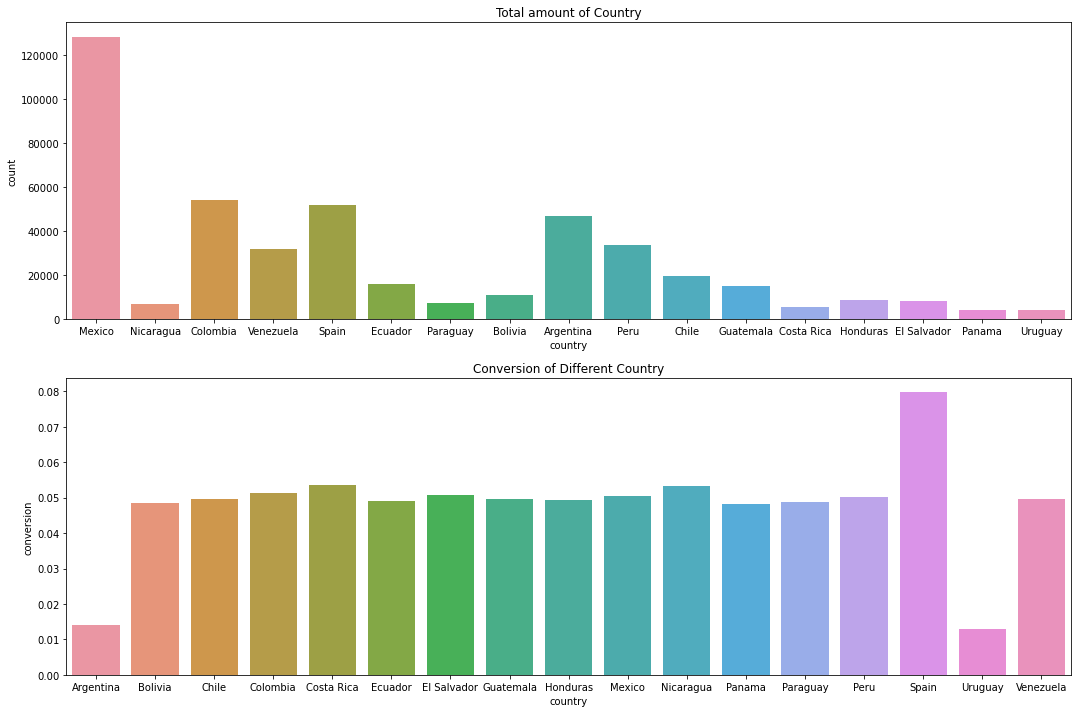

In [21]:
fig, ax = plt.subplots(nrows=2, ncols=1,figsize=(18, 12))

sns.countplot(data=df, x='country',ax=ax[0])
country_df = df[["country", "conversion"]].groupby(["country"], as_index=False).mean()
sns.barplot(x="country", y="conversion", data=country_df,ax=ax[1])

ax[0].set_title('Total amount of Country')
ax[1].set_title('Conversion of Different Country')

In [22]:
combined = test.merge(user, on = 'user_id', how = 'outer')
combined.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 453321 entries, 0 to 453320
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   user_id           453321 non-null  int64  
 1   date              453321 non-null  object 
 2   source            453321 non-null  object 
 3   device            453321 non-null  object 
 4   browser_language  453321 non-null  object 
 5   ads_channel       181877 non-null  object 
 6   browser           453321 non-null  object 
 7   conversion        453321 non-null  int64  
 8   test              453321 non-null  int64  
 9   sex               452867 non-null  object 
 10  age               452867 non-null  float64
 11  country           452867 non-null  object 
dtypes: float64(1), int64(3), object(8)
memory usage: 45.0+ MB


In [23]:
control = combined.loc[combined['test']==0]
test = combined.loc[combined['test']==1]
control.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 237338 entries, 0 to 453318
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   user_id           237338 non-null  int64  
 1   date              237338 non-null  object 
 2   source            237338 non-null  object 
 3   device            237338 non-null  object 
 4   browser_language  237338 non-null  object 
 5   ads_channel       95348 non-null   object 
 6   browser           237338 non-null  object 
 7   conversion        237338 non-null  int64  
 8   test              237338 non-null  int64  
 9   sex               237093 non-null  object 
 10  age               237093 non-null  float64
 11  country           237093 non-null  object 
dtypes: float64(1), int64(3), object(8)
memory usage: 23.5+ MB


In [24]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 215983 entries, 1 to 453320
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   user_id           215983 non-null  int64  
 1   date              215983 non-null  object 
 2   source            215983 non-null  object 
 3   device            215983 non-null  object 
 4   browser_language  215983 non-null  object 
 5   ads_channel       86529 non-null   object 
 6   browser           215983 non-null  object 
 7   conversion        215983 non-null  int64  
 8   test              215983 non-null  int64  
 9   sex               215774 non-null  object 
 10  age               215774 non-null  float64
 11  country           215774 non-null  object 
dtypes: float64(1), int64(3), object(8)
memory usage: 21.4+ MB


In [25]:
test_data = combined[combined['country'] != 'Spain']
test_val = test_data[test_data['test'] == 1]['conversion'].values
cont_val = test_data[test_data['test'] == 0]['conversion'].values

print(test_val.mean(), cont_val.mean())

0.043424713982118966 0.04833042316066309


In [26]:
print(ttest_ind(test_val, cont_val, equal_var=False))

Ttest_indResult(statistic=-7.3939374121344805, pvalue=1.4282994754055316e-13)


In [ ]:
# the conversion rate of test group is lower then control group
# p-value is way smaller than 0.05
# testing is not significant currently 